# Creative Gaming: Propensity-to-Buy Modeling

* Team-lead GitHub userid: rsm-wez038
* Group name: group 20
* Team member names:
    - Wenpu Zhang
    - Lynn Li
    - Jessie Chen
    - Ran Ji

## Setup

Please complete this python notebook with your group by answering the questions in `cg-prop-to-buy.pdf`. Create a Notebook with all your results and comments and push both the Notebook to GitHugLab when your team is done.

Create a Notebook with all your results and comments and push both the Notebook to GitHub when your team is done. Before the deadline, make sure to connect the GitHub repo to GradeScope. All results MUST be reproducible (i.e., the TA and I must be able to recreate your output from the Jupyter Notebook without changes or errors). This means that you should NOT use any python-packages that are not part of the RSM-MSBA docker container.

> Note: Please do not install any packages as part of your Jupyter Notebook submission

This is the secone group assignment for MGTA 455 and you will be using Git and GitHub. If two people edit the same file at the same time you could get what is called a "merge conflict". This is not something serious but you should realize that Git will not decide for you who's changes to accept. The team-lead will have to determine the edits to use. To avoid merge conflicts, **always** "pull" changes to the repo before you start working on any files. Then, when you are done, save and commit your changes, and then push them to GitHub. Make "pull first" a habit!

If multiple people are going to work on the assignment at the same time I recommend you work in different notebooks. You can then `%run ...`  these "sub" notebooks from the main assignment file. You can seen an example of this in action below for the `question1.ipynb` notebook

Some group work-flow tips:

* Pull, edit, save, stage, commit, and push
* Schedule who does what and when
* Try to avoid working simultaneously on the same file
* If you are going to work simultaneously, do it in different notebooks, e.g.,
    - question1.ipynb, question2.ipynb, question3.ipynb
* Use the `%run ... ` command to bring different pieces of code together into the main jupyter notebook
* Put python functions in modules that you can import from your notebooks. See the example below for the `example` function defined in `utils/functions.py`

A graphical depiction of the group work-flow is shown below:

![](images/github-group-workflow.png)

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import pyrsm as rsm
import numpy as np

# increase plot resolution
# mpl.rcParams["figure.dpi"] = 150

In [2]:
## loading the data - this dataset must NOT be changed
cg_organic = pd.read_parquet("data/cg_organic.parquet")
rsm.md("data/cg_organic_description.md")

## Creative gaming

Game telemetry dataset used for the Creative Gaming: Propensity-to-Buy Modeling case

#### Feature descriptions

* converted: Purchased the Zalon campain ("yes" or "no")
* GameLevel: Highest level of game achieved by the user
* NumGameDays: Number of days user played the game in last month (with or without network connection)
* NumGameDays4Plus: Number of days user played the game in last month with 4 or more total users (this implies using a network connection)
* NumInGameMessagesSent: Number of in-game messages sent to friends
* NumFriends: Number of friends to which the user is connected (necessary to crew together in multiplayer mode) 
* NumFriendRequestIgnored: Number of friend requests this user has not replied to since game inception
* NumSpaceHeroBadges: Number of "Space Hero" badges, the highest distinction for gameplay in Space Pirates
* AcquiredSpaceship: Flag if the user owns a spaceship, i.e., does not have to crew on another user's or NPC's space ship ("no" or "yes")
* AcquiredIonWeapon: Flag if the user owns the powerful "ion weapon" ("no" or "yes")
* TimesLostSpaceship: The number of times the user destroyed his/her spaceship during gameplay. Spaceships need to be re-acquired if destroyed.
* TimesKilled: Number of times the user was killed during gameplay
* TimesCaptain: Number of times in last month that the user played in the role of a captain
* TimesNavigator: Number of times in last month that the user played in the role of a navigator
* PurchasedCoinPackSmall: Flag if the user purchased a small pack of Zathium in last month ("no" or "yes")
* PurchasedCoinPackLarge: Flag if the user purchased a large pack of Zathium in last month ("no" or "yes")
* NumAdsClicked: Number of in-app ads the user has clicked on
* DaysUser: Number of days since user established a user ID with Creative Gaming (for Space Pirates or previous games)
* UserConsole: Flag if the user plays Creative Gaming games on a console ("no" or "yes")
* UserHasOldOS: Flag if the user has iOS version 10 or earlier ("no" or "yes")
* training: Dummy variable that splits the dataset into a training (1) and test (0) dataset


In [3]:
# load a custom python module
from utils.functions import example
example()


You just accessed a function from your first python packages!
Change the code in utils/function.py to whatever you need for this assignment
Use 'from utils import functions' to get access to your code
You can add modules to import from by adding additional .py files to the 'utils' directory
Note: If you make changes to the content of this file you will have to restart the notebook kernel to get the updates



## Part I:
**1. What is the probability of organically converting to Zalon? (1 point)**

In [4]:
cg_organic

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesKilled,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,training
34184,no,10,11,0,355,0,8,3,yes,no,...,0,5,0,no,no,4,2953,yes,yes,1
192849,no,6,7,1,30,0,0,0,yes,no,...,0,0,0,no,yes,8,2343,yes,no,1
84958,no,8,2,0,69,0,111,13,no,no,...,0,0,0,yes,no,11,2374,yes,no,1
120745,no,5,3,0,40,0,33,1,no,no,...,0,2,0,no,no,3,2708,yes,no,1
137887,no,6,15,0,5,0,62,0,no,no,...,0,0,0,no,no,11,2101,yes,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143641,no,1,12,0,0,0,2,0,no,no,...,0,0,0,yes,no,3,2619,no,no,0
149842,no,4,9,0,0,0,7,8,no,no,...,0,3,7,no,no,21,3835,yes,no,0
155445,no,5,18,0,1,0,0,0,no,no,...,0,0,0,no,no,4,3562,yes,yes,1
159416,no,8,22,0,83,0,0,0,no,no,...,0,0,0,no,no,10,3258,yes,no,1


In [5]:
# Convert 'converted' from "yes"/"no" to 1/0 directly in the calculation
cg_organic['converted_numeric'] = cg_organic['converted'].map({'yes': 1, 'no': 0}).astype(float)

# Calculate the probability of converting to Zalon organically
probability_organic_conversion = cg_organic['converted_numeric'].mean()

print(f"The probability of organically converting to Zalon is: {probability_organic_conversion}")

The probability of organically converting to Zalon is: 0.05753333333333333


**2. Generate basic summary statistics for each feature in the data.  For numeric variables shown the number of observations, the number of missing values, the number of distinct values, and the mean, min, max, and standard deviation.  For non-numeric variables show the number of observations, the number of missing values, the number of distinct values, the most common level, and the least common level (1 point)**

In [6]:
print(cg_organic.dtypes)
data_types = cg_organic.dtypes

converted                  category
GameLevel                     int32
NumGameDays                   int32
NumGameDays4Plus              int32
NumInGameMessagesSent         int32
NumSpaceHeroBadges            int32
NumFriendRequestIgnored       int32
NumFriends                    int32
AcquiredSpaceship          category
AcquiredIonWeapon          category
TimesLostSpaceship            int32
TimesKilled                   int32
TimesCaptain                  int32
TimesNavigator                int32
PurchasedCoinPackSmall     category
PurchasedCoinPackLarge     category
NumAdsClicked                 int32
DaysUser                      int32
UserConsole                category
UserHasOldOS               category
training                      int32
converted_numeric           float64
dtype: object


In [7]:
# Numeric columns:
numeric_columns = [col for col, dtype in data_types.items() if dtype != 'category']

numeric_summary = pd.DataFrame({
    'Number of Observations': cg_organic[numeric_columns].count(),
    'Number of Missing Values': cg_organic[numeric_columns].isnull().sum(),
    'Number of Distinct Values': cg_organic[numeric_columns].nunique(),
    'Mean': cg_organic[numeric_columns].mean(),
    'Min': cg_organic[numeric_columns].min(),
    'Max': cg_organic[numeric_columns].max(),
    'Standard Deviation': cg_organic[numeric_columns].std()
})

numeric_summary

,Number of Observations,Number of Missing Values,Number of Distinct Values,Mean,Min,Max,Standard Deviation
GameLevel,30000,0,10,6.246733,1.0,10.0,2.774055
NumGameDays,30000,0,28,12.241400,1.0,28.0,7.097305
NumGameDays4Plus,30000,0,25,1.257267,0.0,24.0,3.191210
NumInGameMessagesSent,30000,0,641,73.777400,0.0,1227.0,107.441593
NumSpaceHeroBadges,30000,0,13,0.443933,0.0,12.0,1.517762
NumFriendRequestIgnored,30000,0,122,29.589100,0.0,121.0,33.990783
NumFriends,30000,0,485,47.733833,0.0,486.0,94.329939
TimesLostSpaceship,30000,0,143,4.435567,0.0,298.0,11.546392
TimesKilled,30000,0,72,0.293400,0.0,178.0,3.415129
TimesCaptain,30000,0,120,1.583033,0.0,429.0,8.770534


In [8]:
# Categorical Columns:
categorical_columns = [col for col, dtype in data_types.items() if dtype == 'category']

# Number of Observations, Number of Missing Values, Number of Distinct Values
categorical_summary = pd.DataFrame(index=categorical_columns)
categorical_summary['Number of Observations'] = cg_organic[categorical_columns].count()
categorical_summary['Number of Missing Values'] = cg_organic[categorical_columns].isnull().sum()
categorical_summary['Number of Distinct Values'] = cg_organic[categorical_columns].nunique()

#  Most Common Level, Least Common Level
for col in categorical_columns:
    value_counts = cg_organic[col].value_counts()
    most_common_level = value_counts.idxmax()
    least_common_level = value_counts.idxmin()
    categorical_summary.at[col, 'Most Common Level'] = most_common_level
    categorical_summary.at[col, 'Least Common Level'] = least_common_level

categorical_summary

,Number of Observations,Number of Missing Values,Number of Distinct Values,Most Common Level,Least Common Level
converted,30000,0,2,no,yes
AcquiredSpaceship,30000,0,2,no,yes
AcquiredIonWeapon,30000,0,2,no,yes
PurchasedCoinPackSmall,30000,0,2,no,yes
PurchasedCoinPackLarge,30000,0,2,no,yes
UserConsole,30000,0,2,yes,no
UserHasOldOS,30000,0,2,no,yes


**3. Generate histograms for all numeric variables and frequency plots for non-numeric variables (1 point)**

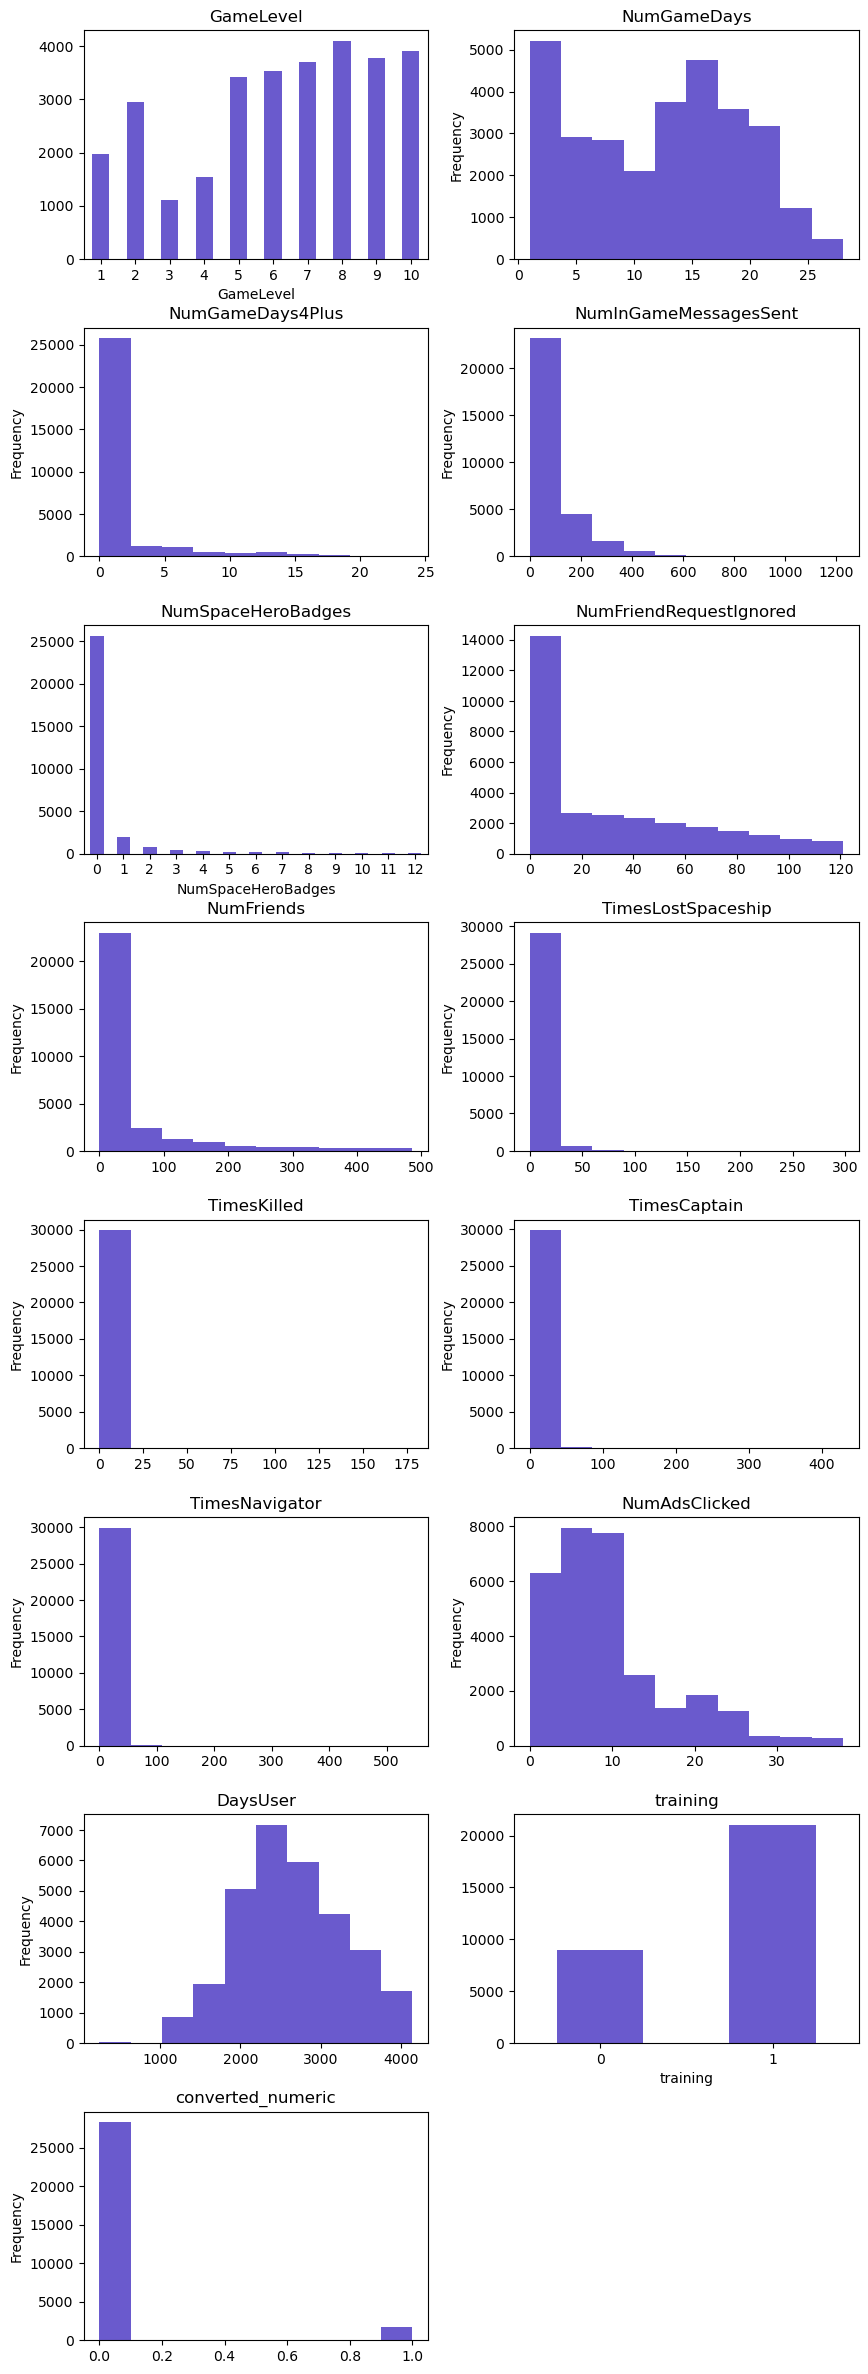

In [9]:
# Histograms for numeric variables:
rsm.distr_plot(cg_organic[numeric_columns])

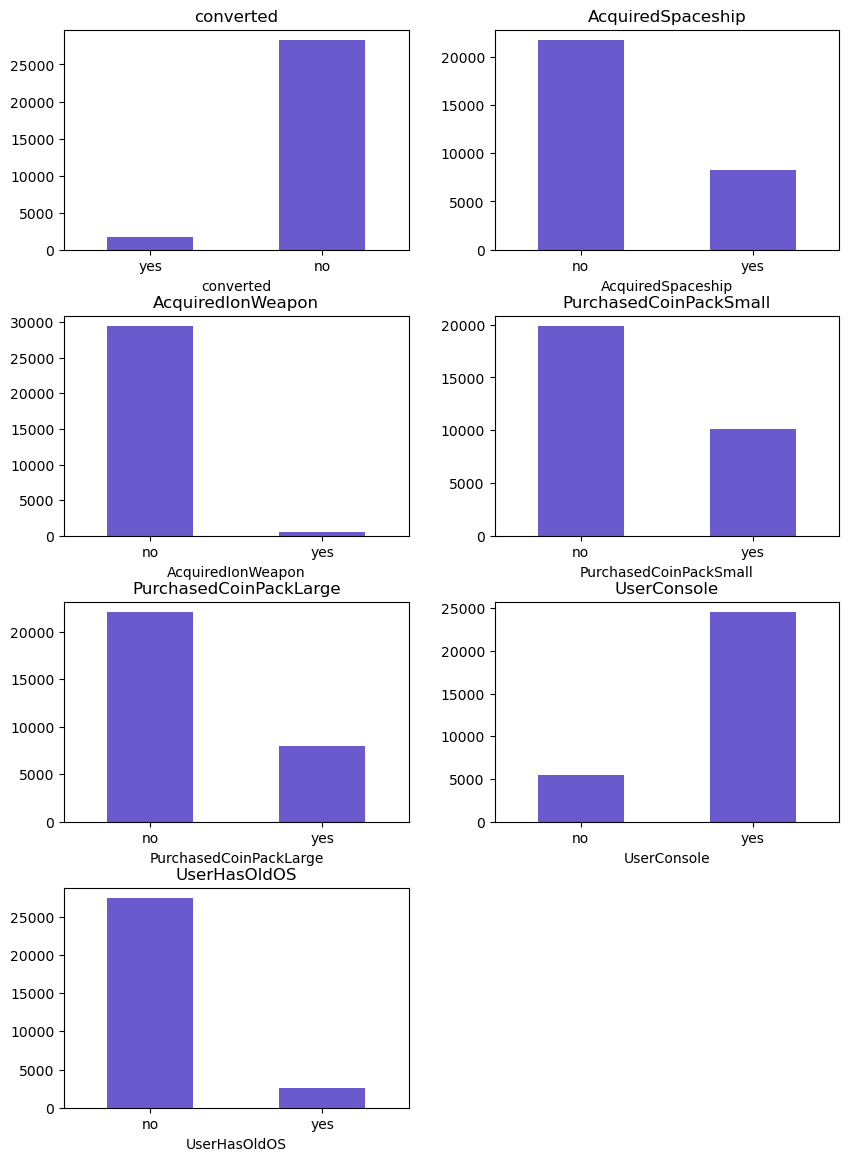

In [10]:
# Frequency plots for categorical variables:
rsm.distr_plot(cg_organic[categorical_columns])

## Part 2:

**1.What are the 5 most important features? (1 point)**

In [11]:
# part2 1. 
cg_organic_dropped = cg_organic.drop(['training', 'converted', 'converted_numeric'], axis=1)

evar = cg_organic_dropped.columns.tolist()

evar


['GameLevel',
 'NumGameDays',
 'NumGameDays4Plus',
 'NumInGameMessagesSent',
 'NumSpaceHeroBadges',
 'NumFriendRequestIgnored',
 'NumFriends',
 'AcquiredSpaceship',
 'AcquiredIonWeapon',
 'TimesLostSpaceship',
 'TimesKilled',
 'TimesCaptain',
 'TimesNavigator',
 'PurchasedCoinPackSmall',
 'PurchasedCoinPackLarge',
 'NumAdsClicked',
 'DaysUser',
 'UserConsole',
 'UserHasOldOS']

Logistic regression (GLM)
Data                 : cg_organic_train
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Null hyp.: There is no effect of x on converted
Alt. hyp.: There is an effect of x on converted

                                OR     OR%  coefficient  std.error  z.value p.value     
Intercept                    0.009  -99.1%        -4.75      0.190  -24.997  < .001  ***
AcquiredSpaceship[yes]       1.713   71.3%         0.54      0.072    7.486  < .001  ***
AcquiredIonWeapon[yes]       1.613   61.3%         0.48      0.203    2.353   0.019    *
PurchasedCoinPackSmall[yes]  0.912   -8.8%        -0.09      0.070   -1.316 

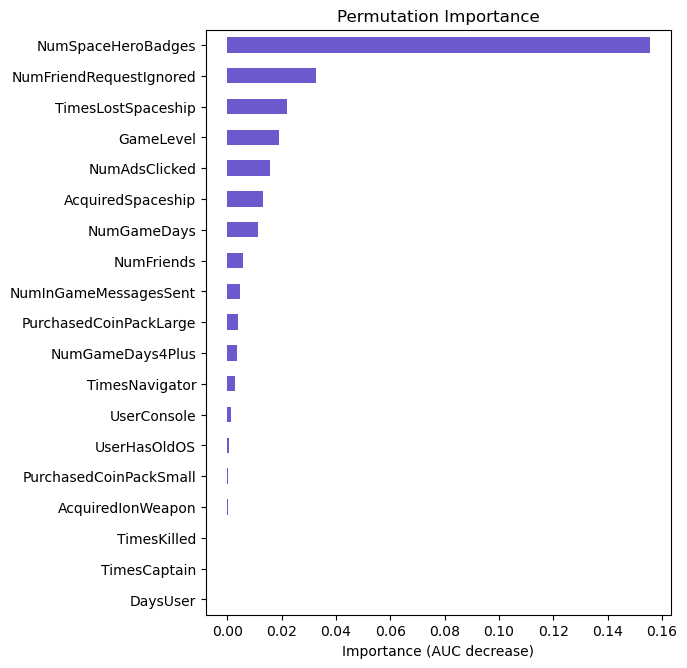

In [12]:
lr = rsm.model.logistic(
    data = {"cg_organic_train": cg_organic[cg_organic.training == 1]},
    rvar = "converted", lev = 'yes',
    evar = evar
)
lr.summary()

lr.plot('vimp')

In [13]:
top5 = ['NumSpaceHeroBadges',
        'NumFriendRequestIgnored',
        'TimesLostSpaceship',
        'GameLevel',
        'NumAdsClicked']

**2. Generate prediction plots for each of these 5 features and summarize your findings**

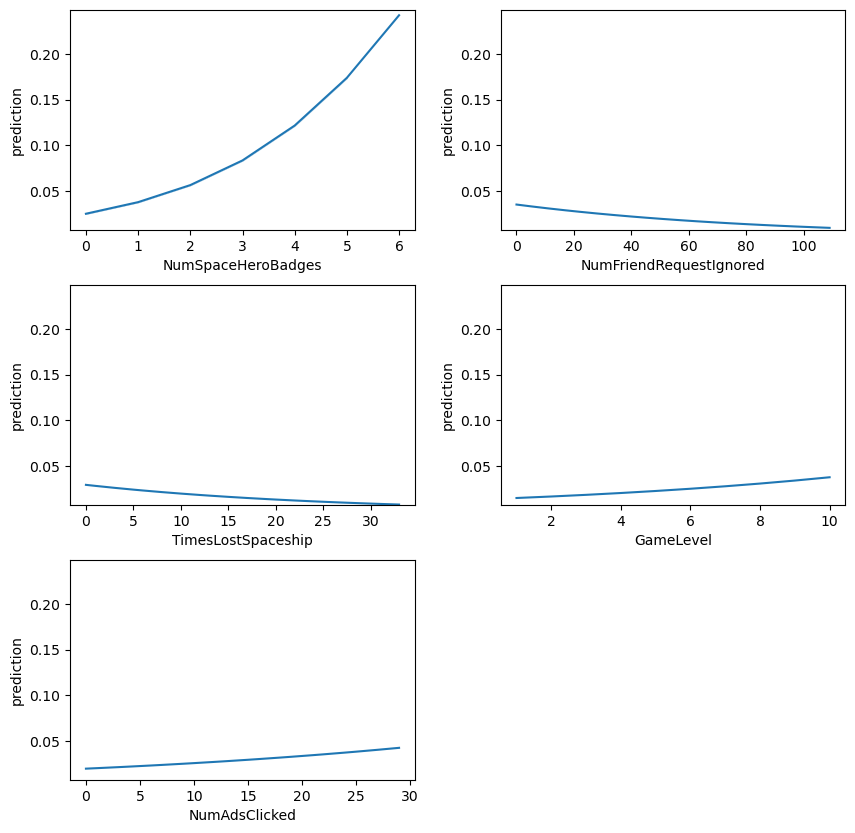

In [14]:
lr.plot('pred', incl = top5)

**The positive relationship between 'NumSpaceHeroBadges' and 'NumAdsClicked' with the prediction suggests that these features are valuable for predicting conversion and might be targeted for increasing user engagement and conversion rates. On the other hand, features like 'NumFriendRequestIgnored' and 'GameLevel' may require a deeper investigation to understand their role or the nature of their relationship with the outcome, as they do not show a clear influence on the predictive model's output.**

1. 'NumSpaceHeroBadges': keep all the other features constant, the higher the number of "Space Hero" badges, the higher the probability of conversion.
2. 'NumFriendRequestIgnored': keep all the other features constant, the higher the number friend requests this user has not replied to since game inception, the lower the probability of conversion.
3. 'TimesLostSpaceship': keep all the other features constant, the higher the number of times the user destroyed his/her spaceship during gameplay, the lower the probability of conversion.
4. 'GameLevel': keep all the other features constant, the higher the game level, the higher the probability of conversion.
5. 'NumAdsClicked': keep all the other features constant, the higher the number of in-app ads the user has clicked on, the higher the probability of conversion.

**3. Create a new variable “pred_logit” with predictions from the logistic regression model for all rows in the data**

In [15]:
cg_organic['pred_logit'] = lr.predict(cg_organic)['prediction']

**4. Plot gains curves for both the training and test set using the “pred_logit” variable**

/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


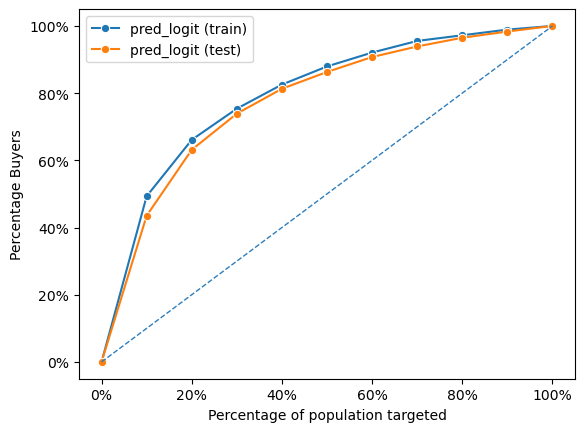

In [16]:
dct = {"train": cg_organic[cg_organic['training'] == 1], "test": cg_organic[cg_organic['training'] == 0]}

fig1 = rsm.gains_plot(dct, "converted", "yes", "pred_logit")

**5. Report the AUC of the model in both the training and test set**

In [17]:
lr.summary(main = False, fit = True)


Pseudo R-squared (McFadden): 0.184
Pseudo R-squared (McFadden adjusted): 0.18
Area under the RO Curve (AUC): 0.82
Log-likelihood: -3719.041, AIC: 7478.081, BIC: 7637.127
Chi-squared: 1682.617, df(19), p.value < 0.001 
Nr obs: 21,000


In [18]:
from sklearn.metrics import roc_auc_score

# Assuming you have already trained your logistic regression model on the training set
# and stored the predictions in the 'pred_logit' column of the test set

# Extract the true labels and predicted probabilities from the test set
y_true = cg_organic[cg_organic['training'] == 0]['converted']
y_pred = cg_organic[cg_organic['training'] == 0]['pred_logit']

# Calculate the AUC
auc1 = roc_auc_score(y_true, y_pred)
print(f"AUC of the organic model in the test set: {auc1}")


AUC of the organic model in the test set: 0.8031498993082917


## Part 3:

**1. Calculate the response rate and profit of group 1.**

In [19]:
group1 = pd.read_parquet('data/cg_organic_control.parquet')
group1

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,TimesLostSpaceship,TimesKilled,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS
110986,no,7,18,0,124,0,81,0,yes,no,8,0,0,4,no,yes,3,2101,no,no
155352,no,10,3,2,60,0,18,479,no,no,10,7,0,0,yes,no,7,1644,yes,no
115449,no,2,1,0,0,0,0,0,no,no,0,0,0,2,no,no,8,3197,yes,yes
138283,no,2,11,1,125,0,73,217,no,no,0,0,0,0,yes,no,6,913,no,no
186787,no,8,15,0,0,0,6,51,yes,no,0,0,2,1,yes,no,21,2009,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24497,no,10,2,0,14,0,105,0,no,no,0,0,0,0,no,no,11,2192,no,no
244206,no,9,7,0,163,2,83,5,no,no,0,0,0,0,yes,no,11,3743,yes,no
87602,no,10,15,0,1,1,59,9,no,no,3,0,0,0,yes,no,22,1858,yes,yes
189294,no,8,11,0,31,0,0,276,no,no,2,0,0,0,yes,no,19,1797,no,no


In [20]:
group1['converted_numeric'] = group1['converted'].map({'yes': 1, 'no': 0}).astype(float)

In [21]:
count_converted1 = group1['converted_numeric'].value_counts()
count_converted1

converted_numeric
0.0    28294
1.0     1706
Name: count, dtype: int64

In [22]:
response_rate1 = count_converted1[1] / len(group1)
response_rate1

0.05686666666666667

In [23]:
## revenue per customer
rev = 14.99
cost1 = 0

profit1 = rev * count_converted1[1] - cost1 * count_converted1.sum()
profit1

25572.94

In [24]:
treatment = pd.read_parquet('data/cg_ad_treatment.parquet')
treatment

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesKilled,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,rnd_30k
109438,no,6,16,0,0,0,0,0,yes,no,...,0,0,0,no,no,11,1827,no,no,0
49977,no,2,8,0,0,0,5,4,no,no,...,0,8,0,yes,no,3,1889,no,yes,1
99506,no,6,1,0,0,0,0,0,no,no,...,0,0,0,no,yes,2,1948,yes,no,0
411831,yes,7,16,0,102,1,0,194,no,no,...,0,0,0,yes,yes,21,3409,yes,yes,0
82610,no,10,1,1,233,0,23,0,no,no,...,0,5,0,no,yes,4,2922,yes,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172637,no,6,8,0,115,0,13,0,yes,no,...,0,0,4,no,no,11,2343,yes,no,1
87840,no,7,19,0,0,0,0,0,no,no,...,0,0,0,no,no,1,3166,yes,no,0
143309,no,1,5,0,207,0,37,10,yes,no,...,0,3,0,yes,yes,5,2619,yes,no,0
159361,no,7,19,1,0,0,88,0,no,no,...,0,1,4,no,no,9,2343,no,no,0


**2. Calculate the response rate and profit of group 2. Set a filter “rnd_30k == 1” to select the 30,000 customers from the 150,000 rows in “cg_ad_treatment”. (2 points)**

In [25]:
group2 = treatment[treatment['rnd_30k'] == 1]
group2


,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesKilled,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,rnd_30k
49977,no,2,8,0,0,0,5,4,no,no,...,0,8,0,yes,no,3,1889,no,yes,1
146436,no,5,15,0,179,0,50,362,yes,no,...,0,4,4,no,no,2,1308,yes,no,1
85884,no,7,7,0,267,0,64,0,no,no,...,0,0,0,no,yes,1,3562,yes,no,1
1668,no,4,4,0,36,0,0,0,no,no,...,0,0,0,no,no,2,2922,yes,no,1
192886,no,8,17,0,222,10,63,20,yes,no,...,0,9,6,yes,no,4,2192,yes,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218705,no,5,1,0,0,0,0,0,no,no,...,0,0,0,yes,yes,11,2374,no,no,1
208111,no,9,12,0,78,0,59,1,yes,no,...,0,0,5,yes,no,2,1978,yes,no,1
77482,no,9,19,1,271,0,71,95,yes,no,...,0,0,3,no,no,2,2831,yes,yes,1
215146,no,10,23,0,76,6,20,107,no,no,...,0,1,0,no,no,9,3197,yes,no,1


In [26]:
group2['converted_numeric'] = group2['converted'].map({'yes': 1, 'no': 0}).astype(float)

count_converted2 = group2['converted_numeric'].value_counts()

response_rate2 = count_converted2[1] / len(group2) 

response_rate2

/tmp/ipykernel_63350/2262225480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group2['converted_numeric'] = group2['converted'].map({'yes': 1, 'no': 0}).astype(float)


0.13043333333333335

In [27]:
cost2 = 1.5


profit2 = rev * count_converted2[1] - cost2 * len(group2)
profit2

13655.870000000003

**3. Calculate the response rate and profit of group 3.**

To do this please: 

a.  Use the logistic regression model you trained in Part II to predict the probability of purchasing the Zalon campaign (i.e., score) all 150,000 gamers in the “cg_ad_treatment”. (1 point) 
 
b.  Select the 30,000 customers with best predictions (scores) that are not part of group 2. Use only these 30,000 to compute conversion rates and profits of group 3. (1 point)**

In [28]:
treatment['pred_logit'] = lr.predict(treatment)['prediction']
treatment

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,rnd_30k,pred_logit
109438,no,6,16,0,0,0,0,0,yes,no,...,0,0,no,no,11,1827,no,no,0,0.058321
49977,no,2,8,0,0,0,5,4,no,no,...,8,0,yes,no,3,1889,no,yes,1,0.010403
99506,no,6,1,0,0,0,0,0,no,no,...,0,0,no,yes,2,1948,yes,no,0,0.025690
411831,yes,7,16,0,102,1,0,194,no,no,...,0,0,yes,yes,21,3409,yes,yes,0,0.122049
82610,no,10,1,1,233,0,23,0,no,no,...,5,0,no,yes,4,2922,yes,no,0,0.039185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172637,no,6,8,0,115,0,13,0,yes,no,...,0,4,no,no,11,2343,yes,no,1,0.041353
87840,no,7,19,0,0,0,0,0,no,no,...,0,0,no,no,1,3166,yes,no,0,0.038769
143309,no,1,5,0,207,0,37,10,yes,no,...,3,0,yes,yes,5,2619,yes,no,0,0.013292
159361,no,7,19,1,0,0,88,0,no,no,...,1,4,no,no,9,2343,no,no,0,0.010421


In [29]:
treatment_dropped = treatment[treatment['rnd_30k'] != 1]

treatment_dropped

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,rnd_30k,pred_logit
109438,no,6,16,0,0,0,0,0,yes,no,...,0,0,no,no,11,1827,no,no,0,0.058321
99506,no,6,1,0,0,0,0,0,no,no,...,0,0,no,yes,2,1948,yes,no,0,0.025690
411831,yes,7,16,0,102,1,0,194,no,no,...,0,0,yes,yes,21,3409,yes,yes,0,0.122049
82610,no,10,1,1,233,0,23,0,no,no,...,5,0,no,yes,4,2922,yes,no,0,0.039185
214343,no,1,6,0,0,0,0,0,no,no,...,0,0,no,yes,9,3470,yes,no,0,0.018541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191256,no,9,17,0,0,0,2,49,no,no,...,0,0,yes,no,3,2313,no,no,0,0.037411
87840,no,7,19,0,0,0,0,0,no,no,...,0,0,no,no,1,3166,yes,no,0,0.038769
143309,no,1,5,0,207,0,37,10,yes,no,...,3,0,yes,yes,5,2619,yes,no,0,0.013292
159361,no,7,19,1,0,0,88,0,no,no,...,1,4,no,no,9,2343,no,no,0,0.010421


In [30]:
# sort by pred_logit
treatment_sorted  = treatment_dropped.sort_values(by=['pred_logit'], ascending=False)

group3 = treatment_sorted.head(30000)
group3

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,rnd_30k,pred_logit
168043,no,10,13,10,29,11,0,390,yes,yes,...,0,0,no,yes,10,2131,yes,no,0,0.981272
161813,no,9,20,16,86,11,0,432,yes,no,...,0,2,no,no,12,1858,yes,no,0,0.977289
27577,no,9,26,11,0,12,48,386,yes,yes,...,0,0,yes,no,5,2343,yes,no,0,0.974903
201338,no,10,23,16,177,12,49,162,yes,no,...,0,3,yes,no,12,3166,yes,no,0,0.969542
175833,no,10,22,11,206,12,26,333,yes,no,...,0,0,yes,no,5,2313,yes,yes,0,0.968986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20850,no,2,13,6,328,0,42,428,yes,no,...,0,0,yes,no,11,2282,no,no,0,0.066212
7403,no,8,8,0,0,1,21,308,no,no,...,10,0,yes,no,15,2374,yes,no,0,0.066209
180484,no,9,17,6,2,0,33,152,yes,no,...,0,20,yes,no,17,2466,yes,no,0,0.066205
440811,yes,6,21,10,0,0,0,0,no,no,...,0,3,no,no,11,4018,yes,no,0,0.066201


In [31]:
group3['converted_numeric'] = group3['converted'].map({'yes': 1, 'no': 0}).astype(float)

count_converted3 = group3['converted_numeric'].value_counts()

response_rate3 = count_converted3[1] / len(group3)

response_rate3

/tmp/ipykernel_63350/2284643859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group3['converted_numeric'] = group3['converted'].map({'yes': 1, 'no': 0}).astype(float)


0.21506666666666666

In [32]:
profit3 = rev * count_converted3[1] - cost2 * len(group3)
profit3

51715.479999999996

**4. Answer Mi Haruki’s question: “Please report back to me how well the ads areworking in terms of conversion rates and profits and by how much the model 
improves these metrics, all based on targeting 30,000 customers.” (2 points)**

In [33]:
import pandas as pd
import numpy as np

# Define the dimensions
rows = 3
columns = 4

# Create a DataFrame with random data
group_df= {
    'group1': [response_rate1, profit1],  # Example data for the first column
    'group2': [response_rate2, profit2],  # Example data for the second column
    'group3': [response_rate3, profit3],  # Example data for the third column
}

group_df = pd.DataFrame(group_df)
group_df.index = ['Response Rate', 'Profit']

group_df

,group1,group2,group3
Response Rate,0.056867,0.130433,0.215067
Profit,25572.940000,13655.870000,51715.480000


**The ads increase the conversion rate from 5.69% to 13.04%, which is an increase of about 7.35 percentage points.The profit increased from $25,572.94 for the group without ads to $136,558.87 for the group with random ad exposure, indicating the ads were successful in driving profit.**

**The model targeting improved the response rate from 13.04% for random ad exposure to 21.51% for targeted exposure, which is an increase of 8.47 percentage points.The profit also increased significantly with model targeting, from $136,558.87 for random ad exposure to $517,154.80 for targeted exposure, indicating that the model's targeting approach is highly effective in maximizing profit.**

**The targeted advertising model dramatically improves both the conversion rate and profit. The model nearly doubles the conversion rate compared to random exposure and quadruples the profit compared to the control group. This suggests that the investment in both advertising and in the development of the targeting model is well justified based on the increased conversion rates and profits.**

**5.Plot the gains curve for all customers that are not in group 2 (i.e., rnd_30k == 0). Also report the AUC of the for this set of customers. Compare the gains curve and AUC to the ones you calculated in Part II.4 and II.5. Why are they different? (2 points)**

In [34]:
treatment_dropped

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,rnd_30k,pred_logit
109438,no,6,16,0,0,0,0,0,yes,no,...,0,0,no,no,11,1827,no,no,0,0.058321
99506,no,6,1,0,0,0,0,0,no,no,...,0,0,no,yes,2,1948,yes,no,0,0.025690
411831,yes,7,16,0,102,1,0,194,no,no,...,0,0,yes,yes,21,3409,yes,yes,0,0.122049
82610,no,10,1,1,233,0,23,0,no,no,...,5,0,no,yes,4,2922,yes,no,0,0.039185
214343,no,1,6,0,0,0,0,0,no,no,...,0,0,no,yes,9,3470,yes,no,0,0.018541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191256,no,9,17,0,0,0,2,49,no,no,...,0,0,yes,no,3,2313,no,no,0,0.037411
87840,no,7,19,0,0,0,0,0,no,no,...,0,0,no,no,1,3166,yes,no,0,0.038769
143309,no,1,5,0,207,0,37,10,yes,no,...,3,0,yes,yes,5,2619,yes,no,0,0.013292
159361,no,7,19,1,0,0,88,0,no,no,...,1,4,no,no,9,2343,no,no,0,0.010421


/tmp/ipykernel_63350/2163281047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatment_dropped['pred_logit'] = lr.predict(treatment_dropped)['prediction'] ## rnd_30k == 0


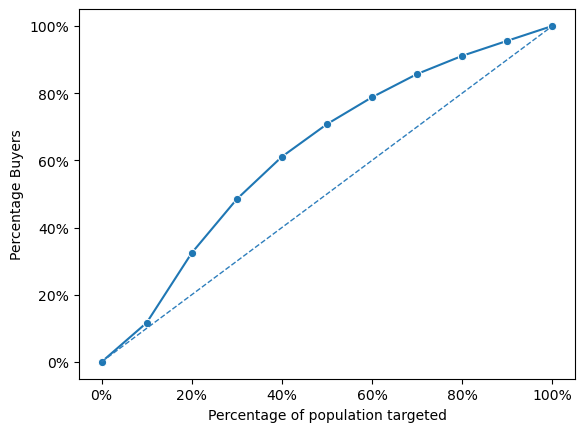

In [35]:
treatment_dropped['pred_logit'] = lr.predict(treatment_dropped)['prediction'] ## rnd_30k == 0

# gains plot
fig = rsm.gains_plot(treatment_dropped, "converted", "yes", "pred_logit")

**AUC**

In [36]:
logit_auc = rsm.auc(treatment[treatment.rnd_30k == 0]['converted'], 
                    treatment[treatment.rnd_30k == 0]['pred_logit'],
                    'yes')

logit_auc

0.6444723410842776

**The model developed on the original data may not be as well aligned with the characteristics of the new population (customers not in Group 2). This misalignment can result from the model being tailored to the idiosyncrasies of the original data, which might not be present in the new data subset.**

**The new subset of customers (excluding Group 2) may have different behaviors or attributes that the model from Part 2 is not capturing effectively. This could be due to a variety of factors not represented in the training data.**

**Changes in market conditions or customer behaviors that occurred after the original model was developed might affect the new predictions.**

**If the data for customers not in Group 2 is from a different time period than the original data, this could lead to different purchasing behaviors that the model cannot account for.**

**6. Why would CG have collecting data for group 1 (cg_organic_control) given that they already had data on organic conversions from the cg_organic data?**

**Collecting data for Group 1 (cg_organic_control) concurrently with an ad campaign, despite pre-existing organic conversion data, is essential to ensure the control group's data is temporally aligned with other groups and subject to the same external variables, such as market trends or global events. This contemporaneous control group serves as a baseline to accurately measure the impact of the ads by factoring out these external influences and isolating the ads' effect. It also allows for a fair comparison that upholds statistical rigor, particularly important if a predictive model is used to select another group (Group 3), ensuring that any observed differences in conversion rates and behaviors are due to the ads and not other confounding factors. This methodological approach provides a more accurate, relevant, and statistically valid assessment of the ad campaign's effectiveness and the predictive model's accuracy.**

## Part 4:

**1. Retrain the logistic regression model from Part II on the random sample of 30K customers in “cg_ad_treatment” and generate predictions for all 150,000 customers. Assign the predictions to a new variable “pred_logit_ad”.**

In [37]:
lr4 = rsm.model.logistic(
    data = {'cg_ad_treatment': group2},
    rvar = "converted", lev = 'yes',
    evar = evar
)

treatment['pred_logit_ad'] = lr4.predict(treatment)['prediction']


**2. Compare the performance of the original “organic” model from Part II and the new “ad” model across the 120,000K customers that are not in group 2. Use gains curves and AUC to make the comparison. What do you find?**

treatment['pred_logit'] = lr.predict(treatment)['prediction']

In [38]:
## organic model from part 2: auc1
not_group2_auc1 = rsm.auc(treatment[treatment.rnd_30k == 0]['converted'], 
                    treatment[treatment.rnd_30k == 0]['pred_logit'],
                    'yes')

not_group2_auc1

0.6444723410842776

In [39]:
## 120,000 not in group 2 = treatment_dropped

#len(treatment_dropped) = 120000

not_group2_auc2 = rsm.auc(treatment[treatment.rnd_30k == 0]['converted'], 
                    treatment[treatment.rnd_30k == 0]['pred_logit_ad'],
                    'yes')

not_group2_auc2


0.7030674399706048

/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


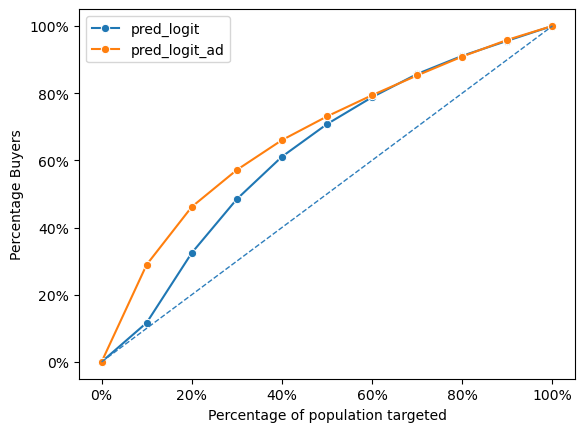

In [40]:
fig2 = rsm.gains_plot(treatment[treatment.rnd_30k == 0], "converted", "yes", ['pred_logit',"pred_logit_ad"])

**AUC:**
1. AUC for the Original "Organic" Model: The AUC for the original model, which we'll refer to as not_group2_auc1, is 0.6444723410842776. This value indicates the model's ability to distinguish between those who converted and those who did not, with a score closer to 1 indicating better performance. A score of 0.6445 suggests the model has a moderate ability to differentiate between the two groups.

2. AUC for the New "Ad" Model: The AUC for the new "ad" model, referred to as not_group2_auc2, is 0.7030674399706048. This improvement in AUC suggests that the "ad" model is better at distinguishing between converters and non-converters compared to the original "organic" model. An AUC of 0.7031 represents a significant improvement and indicates a higher predictive accuracy.

Comparison and Findings:

Improved Performance: The increase in AUC from 0.6445 to 0.7031 demonstrates that the new "ad" model performs better than the original "organic" model in predicting conversions among the 120,000 customers not in group 2. This suggests that incorporating ad-related features or adjustments in the model has enhanced its predictive capability.

Practical Implication: The higher AUC of the "ad" model indicates it can more effectively rank individuals by their likelihood of converting, which is crucial for targeting and marketing strategies. It means that the "ad" model could potentially lead to more efficient use of marketing resources by focusing efforts on individuals more likely to convert.

To further analyze these findings, creating gains curves for both models would provide additional insights. Gains curves visually represent the effectiveness of a model in targeting a subset of cases with the highest probability of being positive (in this case, converted). By comparing gains curves, we can assess not just the overall predictive power (as with AUC) but also how well each model identifies the most promising prospects.

In summary, the "ad" model's superior AUC suggests it is a better tool for predicting conversions among the customer base outside group 2, indicating a significant improvement over the original "organic" model. This underlines the value of refining models with additional data or features to improve marketing strategies.

**Gains plots:**

Gains Chart Analysis: The gains chart plots the percentage of buyers (y-axis) against the percentage of the population targeted (x-axis). A model's curve that is above another indicates a better performance in identifying buyers with a smaller percentage of the population targeted.

1. Pred_logit (Original "Organic" Model): The curve for pred_logit (the blue line) is below the pred_logit_ad curve, which indicates that while it does identify buyers, it requires targeting a larger portion of the population to capture the same percentage of buyers as the pred_logit_ad model.

2. Pred_logit_ad (New "Ad" Model): The pred_logit_ad model's curve (the orange line) is consistently above the pred_logit curve. This means that the pred_logit_ad model requires targeting a smaller percentage of the population to capture the same percentage of buyers, or it captures a higher percentage of buyers when targeting the same percentage of the population.

The gains chart provides a visual confirmation that the pred_logit_ad model is more effective at identifying potential buyers than the pred_logit model. This aligns with the AUC results, where the pred_logit_ad model also had a higher AUC, confirming its superior predictive performance.

Integrating the Gains Chart into the Comparison:

Efficiency in Targeting: The gains chart suggests that the pred_logit_ad model is more efficient, as it achieves a higher capture rate of buyers with less targeting. This is particularly valuable in marketing campaigns where reducing costs while maintaining or improving conversion rates is a key objective.

Marketing Strategy Implications: With the pred_logit_ad model, marketing efforts can be more focused and potentially more cost-effective. The steeper curve indicates that a higher concentration of likely buyers is found within a smaller targeted group, making it a more efficient tool for resource allocation.

In summary, both the AUC and the gains chart consistently demonstrate the superior performance of the pred_logit_ad model over the pred_logit model. The new model identifies potential buyers more effectively, requiring less outreach to achieve better conversion results, which could lead to more targeted and cost-effective marketing strategies.


**3. Calculate the profit improvement of using the “ad” model instead of the “organic” model to target the best 30,000 customers in the “cg_ad_treatment” data that are not in “rnd_30k == 1”**

In [41]:
## using lr4 model and lr model to compare
## not in rnd_30k == 1 --> treatment_dropped
## target best 30,000 customers

## sort and select top 30,000 customers
treatment_dropped2 = treatment[treatment['rnd_30k'] == 0]

## sort by pred_logit_ad
sort_treatment_dropped2  = treatment_dropped2.sort_values(by=['pred_logit_ad'], ascending=False)

## select top 30,000 customers
best30k_ad = sort_treatment_dropped2.head(30000)

## profit
best30k_ad['converted_numeric'] = best30k_ad['converted'].map({'yes': 1, 'no': 0}).astype(float)
profit_ad = rev * best30k_ad['converted_numeric'].sum() - cost2 * len(best30k_ad)

profit_ad


## sort by pred_logit
sort_treatment_dropped  = treatment_dropped.sort_values(by=['pred_logit'], ascending=False)

## select top 30,000 customers
best30k = sort_treatment_dropped.head(30000)

## profit
best30k['converted_numeric'] = best30k['converted'].map({'yes': 1, 'no': 0}).astype(float)
profit = rev * best30k['converted_numeric'].sum() - cost2 * len(best30k)

profit,profit_ad

diff = profit_ad - profit

print(f"The profit has improved by ad: {diff}")

profit,profit_ad

The profit has improved by ad: 26457.350000000006


/tmp/ipykernel_63350/346133808.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best30k_ad['converted_numeric'] = best30k_ad['converted'].map({'yes': 1, 'no': 0}).astype(float)
/tmp/ipykernel_63350/346133808.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best30k['converted_numeric'] = best30k['converted'].map({'yes': 1, 'no': 0}).astype(float)


(51715.479999999996, 78172.83)

**4. Compare the permutation importance plot of the “organic” and the “ad” model. Explain why you think the plots differ.**

(None, None)

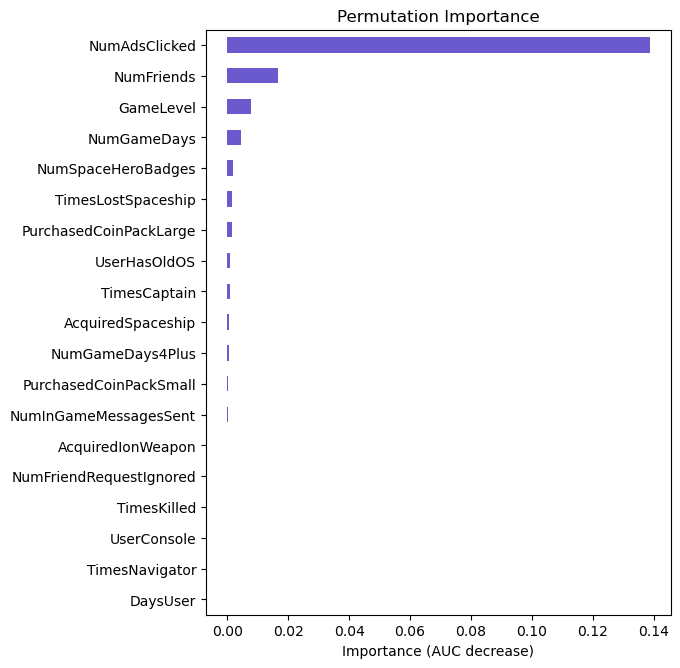

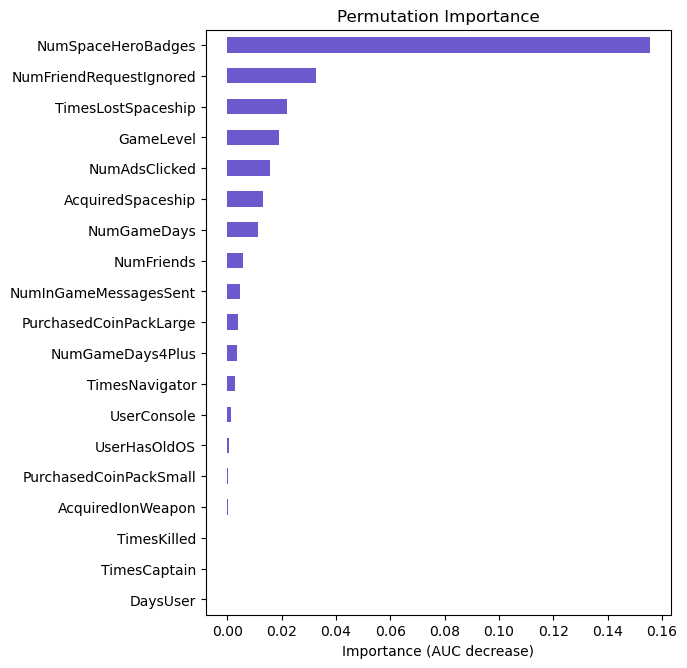

In [42]:
lr4.plot('vimp'), lr.plot('vimp')

**In comparing the permutation importance plots for the "organic" and the "ad" models, we notice some differences in which features are deemed most important for predicting outcomes in the respective models.**

**For the "organic" model, the most important features appear to be `NumSpaceHeroBadges`, `NumFriendRequestIgnored`, and `TimesLostSpaceship`. These features likely represent user engagement and achievement within the game, which might naturally drive organic conversions without the influence of advertising.**

**On the other hand, the "ad" model assigns the highest importance to `NumAdsClicked`, `NumFriends`, and `GameLevel`. The prominence of `NumAdsClicked` suggests a direct influence of ad interaction on conversions—essentially, users who interact with ads may be more likely to convert due to the ad campaign. `NumFriends` and `GameLevel` could be indicative of social and competitive aspects, which might be more pronounced in users who are susceptible to advertising, perhaps because these users are more engaged and the ads are more targeted.**

**The difference in the feature importance between the two models can be attributed to the nature of the conversion triggers. Organic conversions might be driven more by the user's progression and engagement in the game, whereas conversions from the "ad" model may be influenced by direct responses to marketing efforts and the users' social interactions. This suggests that advertising might amplify the importance of social features and immediate responses to ads, like clicking, whereas organic growth relies on more intrinsic gameplay factors.**

## Part 5:

**1. Retrain the logistic regression model from Part II on the random sample of 30K customers in “cg_ad_treatment” and generate predictions for all 150,000 customers. Assign the predictions to a new variable “pred_logit_ad”. (2 points)**

In [43]:
clf1 = rsm.model.mlp(
    data={"treatment": group2},
    rvar="converted",
    lev="yes",
    evar=evar,
    hidden_layer_sizes=(1,),
    mod_type="classification",
)
clf1.summary()

/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.56231027 -0.47830937  0.24435789 ...  0.96702516  1.32835879
 -0.11697574]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.62250776  0.36065056 -0.76295895 ...  0.92245532  1.48426007
 -0.62250776]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.41099187

Multi-layer Perceptron (NN)
Data                 : treatment
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Model type           : classification
Nr. of features      : (19, 19)
Nr. of observations  : 30,000
Hidden_layer_sizes   : (1,)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.0001
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 10000
random_state         : 1234
AUC                  : 0.706

Raw data             :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends AcquiredSpaceship AcquiredIonW

In [44]:
## Grid Search
from sklearn.model_selection import GridSearchCV

hls = [(2,),(4,2),(4,),(3,)]

param_grid = {'hidden_layer_sizes': hls}
scoring = {'AUC': 'roc_auc'}

clf_cv = GridSearchCV(
    clf1.fitted, param_grid, scoring=scoring, cv=5, n_jobs = 4, refit = 'AUC', verbose = 5
)

clf1.data_onehot.mean().round(3)
clf_cv.fit(clf1.data_onehot, clf1.data.converted)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=MLPClassifier(activation='tanh', hidden_layer_sizes=(1,),
                                     max_iter=10000, random_state=1234,
                                     solver='lbfgs'),
             n_jobs=4,
             param_grid={'hidden_layer_sizes': [(2,), (4, 2), (4,), (3,)]},
             refit='AUC', scoring={'AUC': 'roc_auc'}, verbose=5)

In [45]:
clf1.data_onehot.head()
pd.DataFrame(clf_cv.cv_results_).iloc[:, 5:].sort_values("rank_test_AUC")

,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC
1,"{'hidden_layer_sizes': (4, 2)}",0.766364,0.774557,0.782957,0.774817,0.759510,0.771641,0.008021,1
0,"{'hidden_layer_sizes': (2,)}",0.749975,0.742705,0.767524,0.755790,0.760807,0.755360,0.008567,2
3,"{'hidden_layer_sizes': (3,)}",0.748441,0.744124,0.763563,0.726441,0.763293,0.749172,0.013778,3
2,"{'hidden_layer_sizes': (4,)}",0.738138,0.782966,0.754807,0.726931,0.728937,0.746356,0.020784,4


In [46]:
clf2 = rsm.model.mlp(
    data={"treatment": group2},
    rvar="converted",
    lev="yes",
    evar=evar,
    hidden_layer_sizes=(4,2),
    mod_type="classification",
)
clf2.summary()

/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.56231027 -0.47830937  0.24435789 ...  0.96702516  1.32835879
 -0.11697574]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.62250776  0.36065056 -0.76295895 ...  0.92245532  1.48426007
 -0.62250776]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.41099187

Multi-layer Perceptron (NN)
Data                 : treatment
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Model type           : classification
Nr. of features      : (19, 19)
Nr. of observations  : 30,000
Hidden_layer_sizes   : (4, 2)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.0001
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 10000
random_state         : 1234
AUC                  : 0.794

Raw data             :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends AcquiredSpaceship AcquiredIo

**2. Compare the performance of the neural network “ad” model and the logistic regression “ad” model from Part IV using data from the 120,000K customers that are not in group 2. Use gains curves and AUC for the comparison. What do you find?**

In [47]:
treatment['pred_nn_ad'] = clf2.predict(treatment)['prediction']


/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.11697574 -1.56231027 -0.11697574 ... -1.92364391  0.24435789
 -0.47830937]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.50110175 -0.62250776 -1.60566608 ... -1.04386132  0.92245532
 -0.20115419]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.41099187

In [48]:
## check ad_nn performance by using group 3
group2_clf_auc= rsm.auc(treatment[treatment.rnd_30k == 0]['converted'], 
                    treatment[treatment.rnd_30k == 0]['pred_nn_ad'],
                    'yes')

group2_clf_auc

0.7847173984441242

In [49]:
## check ad_logit performance by using group 3
group2_logit_auc= rsm.auc(treatment[treatment.rnd_30k == 0]['converted'],
                    treatment[treatment.rnd_30k == 0]['pred_logit_ad'],
                    'yes')

group2_logit_auc

0.7030674399706048

/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


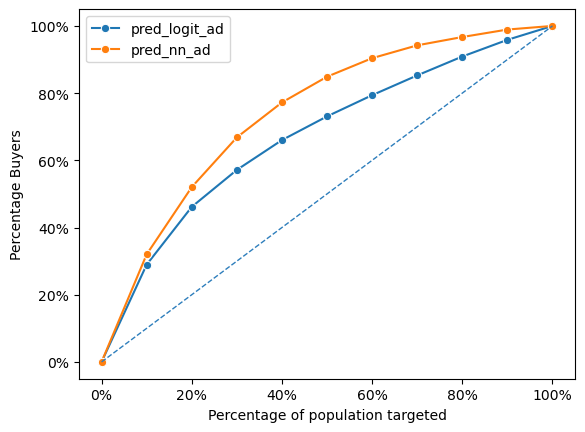

In [50]:
## gains plot
fig3 = rsm.gains_plot(treatment[treatment.rnd_30k == 0], "converted", "yes", ['pred_logit_ad',"pred_nn_ad"])

The AUC (Area Under the Curve) values for each model:

The AUC for the neural network model (pred_nn_ad) is 0.7847173984441242.
The AUC for the logistic regression model (pred_logit_ad) is 0.7030674399706048.
The AUC values suggest that the neural network model performs better at distinguishing between the positive and negative classes than the logistic regression model. The higher AUC value for the neural network model indicates that, on average, it ranks a random positive instance more highly than a random negative instance, as compared to the logistic regression model.

From the gains curve chart, we can observe the following:

The pred_nn_ad curve is above the pred_logit_ad curve, which visually indicates that the neural network model is more effective at identifying buyers than the logistic regression model when we target the same percentage of the population.
Both curves are above the diagonal line, which would represent a random or no-skill classifier. This confirms that both models have predictive value.
In summary, based on the provided AUC values and the gains curve chart, the neural network model (pred_nn_ad) outperforms the logistic regression model (pred_logit_ad) for the dataset of 120,000 customers that are not in group 2. The neural network model can achieve a higher percentage of true positives with a smaller portion of the population targeted, which may lead to more efficient use of resources in a marketing campaign or similar application where the model is being used.

**3. Calculate the profit improvement of using the neural network “ad” model and the logistic regression “ad” model to target the best 30,000 customers out of the 120,000K customers that are not in group 2.**

In [51]:
## profit improvement
## nn_ad & logit_ad
## target 30k out of 120k (treatment_dropped --> top 30k --> group 3)

## sort by pred_nn_ad
treatment_dropped3 = treatment[treatment['rnd_30k'] == 0]
sort_treatment_dropped_nn  = treatment_dropped3.sort_values(by=['pred_nn_ad'], ascending=False)
## select top 30,000 customers
best30k_nn = sort_treatment_dropped_nn.head(30000)

## profit
best30k_nn['converted_numeric'] = best30k_nn['converted'].map({'yes': 1, 'no': 0}).astype(float)
profit_nn = rev * best30k_nn['converted_numeric'].sum() - cost2 * len(best30k_nn)

profit_nn, profit_ad

diff_nn_ad = profit_nn - profit_ad

profit_nn, profit_ad, diff_nn_ad
print(f"The profit has improved by ad_nn: {diff_nn_ad}")

The profit has improved by ad_nn: 18197.86


/tmp/ipykernel_63350/2089642093.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best30k_nn['converted_numeric'] = best30k_nn['converted'].map({'yes': 1, 'no': 0}).astype(float)


**4. Train and tune a random forest on the random sample of customers who were exposed to the ad campaign (i.e., rnd_30k == 1). Select two hyper parameters for your grid to tune on, one of which should be “max_features”. Choose at least 5 different values for “max_features” for your grid.**

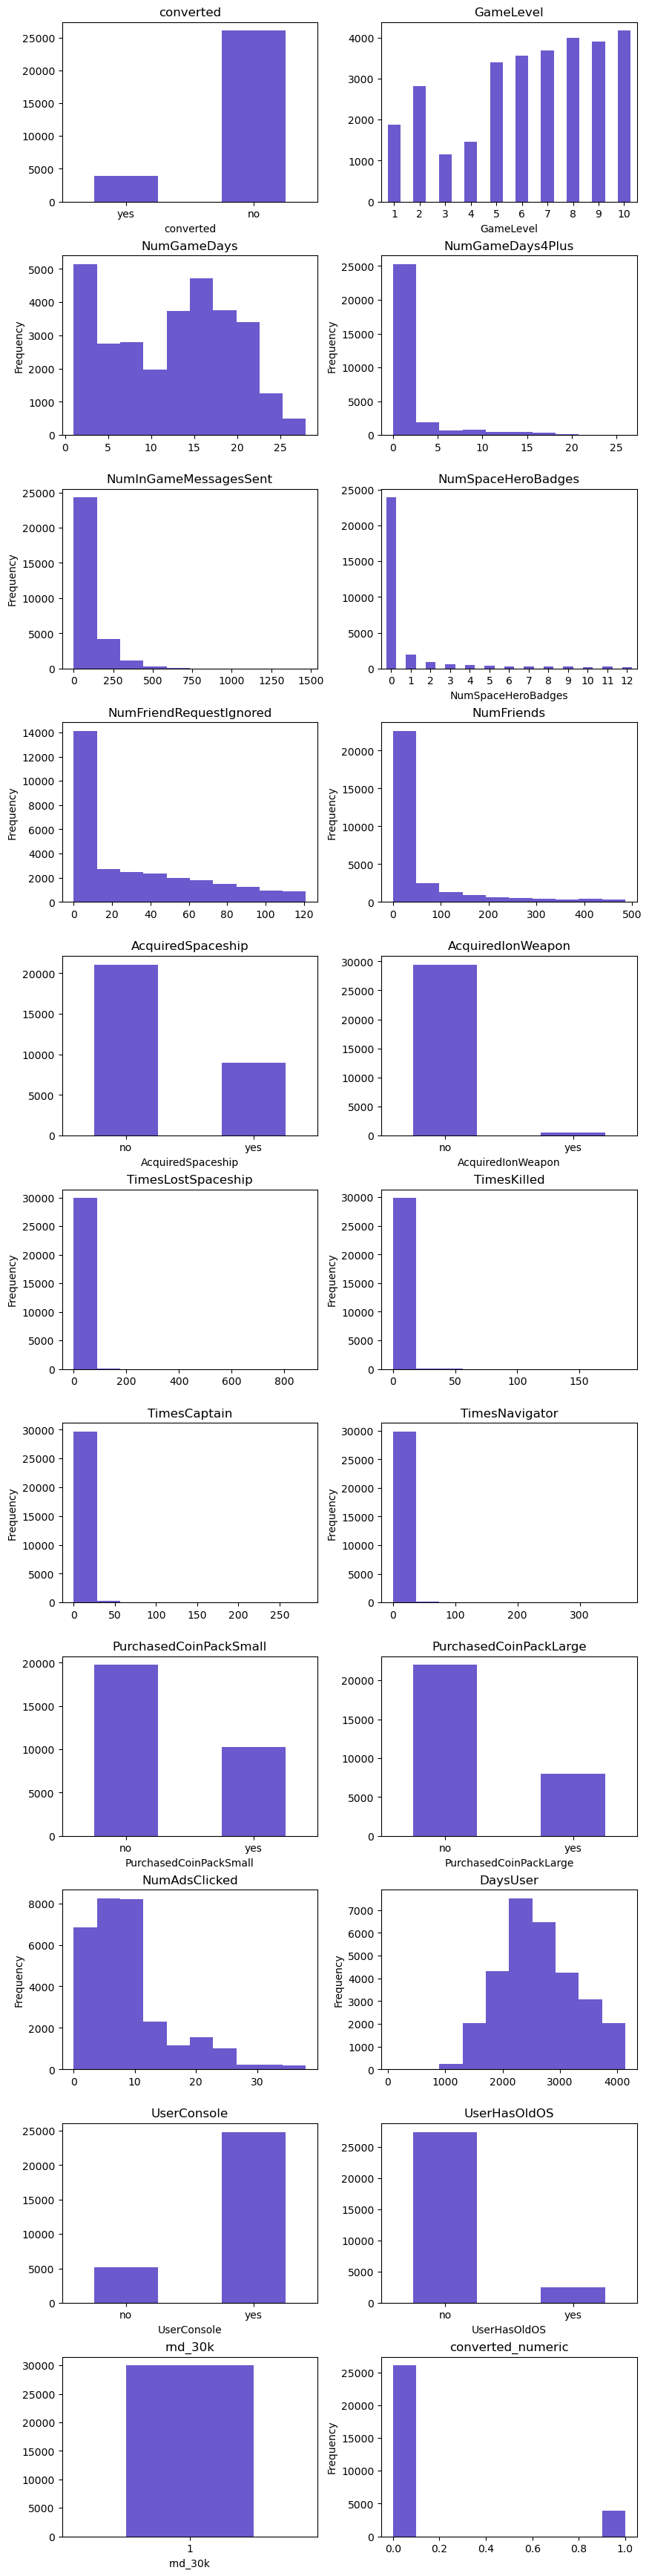

In [52]:
## visualize the data first
rsm.distr_plot(group2.loc[:])

In [53]:
## rnd_30k == 1 --> group 2

rf = rsm.model.rforest(
    {'rnd_30k == 1': group2},
    rvar = "converted", lev = 'yes',
    evar = evar
)

rf.summary()

Random Forest
Data                 : rnd_30k == 1
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
OOB                  : True
Model type           : classification
Nr. of features      : (19, 25)
Nr. of observations  : 30,000
max_features         : sqrt (5)
n_estimators         : 100
min_samples_leaf     : 1
random_state         : 1234
AUC                  : 0.762

Estimation data      :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends  TimesLostSpaceship  TimesKilled  TimesCaptain  TimesNavigator  NumAdsClicked  DaysUser  AcquiredSpaceship_no  AcquiredSpaceship_y

In [54]:
## define max_features options
max_features_options = ['sqrt', 'log2', 0.2, 0.5, None]

# pram_grid
param_grid = {
    'n_estimators': [10,20,50,100,200,500],
    'max_features': max_features_options
}

# scoring
scoring = {'AUC': 'roc_auc'}

# setup GridSearchCV
rf2_cv = GridSearchCV(
    rf.fitted, 
    param_grid,
    scoring=scoring,
    cv=5,
    n_jobs=4,
    refit='AUC',
    verbose=5
)

# GridSearchCV
rf2_cv.fit(rf.data_onehot, rf.data.converted)  

## check the results
results_df = pd.DataFrame(rf2_cv.cv_results_).iloc[:, 5:].sort_values("rank_test_AUC")
print(results_df)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


/opt/conda/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


   param_n_estimators                                         params  \
11                500  {'max_features': 'log2', 'n_estimators': 500}   
5                 500  {'max_features': 'sqrt', 'n_estimators': 500}   
17                500     {'max_features': 0.2, 'n_estimators': 500}   
4                 200  {'max_features': 'sqrt', 'n_estimators': 200}   
16                200     {'max_features': 0.2, 'n_estimators': 200}   
10                200  {'max_features': 'log2', 'n_estimators': 200}   
23                500     {'max_features': 0.5, 'n_estimators': 500}   
3                 100  {'max_features': 'sqrt', 'n_estimators': 100}   
15                100     {'max_features': 0.2, 'n_estimators': 100}   
9                 100  {'max_features': 'log2', 'n_estimators': 100}   
22                200     {'max_features': 0.5, 'n_estimators': 200}   
21                100     {'max_features': 0.5, 'n_estimators': 100}   
29                500    {'max_features': None, 'n_estimators': 

In [55]:
rf3 = rsm.model.rforest(
    {'rnd_30k == 1': group2},
    rvar = "converted", lev = 'yes',
    evar = evar,
    n_estimators = 20,
    max_features = 0.5
)

rf3.summary()

Random Forest
Data                 : rnd_30k == 1
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
OOB                  : True
Model type           : classification
Nr. of features      : (19, 25)
Nr. of observations  : 30,000
max_features         : 0.5 (0)
n_estimators         : 20
min_samples_leaf     : 1
random_state         : 1234
AUC                  : 0.701

Estimation data      :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends  TimesLostSpaceship  TimesKilled  TimesCaptain  TimesNavigator  NumAdsClicked  DaysUser  AcquiredSpaceship_no  AcquiredSpaceship_yes

/opt/conda/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


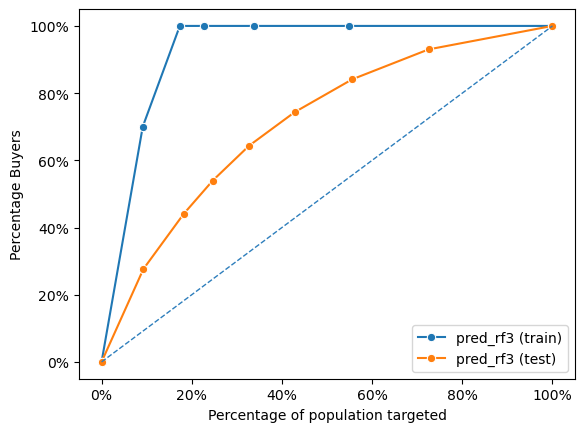

In [56]:
## check overfitting:
# gains plot
treatment['pred_rf3'] = rf3.predict(treatment)['prediction']

dct = {"train": treatment[treatment['rnd_30k'] == 1], "test": treatment[treatment['rnd_30k'] == 0]}
fig1 = rsm.gains_plot(dct, "converted", "yes", "pred_rf3")

In [57]:
rf4 = rsm.model.rforest(
    {'rnd_30k == 1': group2},
    rvar = "converted", lev = 'yes',
    evar = evar,
    n_estimators = 50,
    max_features = 0.2
)

rf4.summary()

Random Forest
Data                 : rnd_30k == 1
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
OOB                  : True
Model type           : classification
Nr. of features      : (19, 25)
Nr. of observations  : 30,000
max_features         : 0.2 (0)
n_estimators         : 50
min_samples_leaf     : 1
random_state         : 1234
AUC                  : 0.742

Estimation data      :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends  TimesLostSpaceship  TimesKilled  TimesCaptain  TimesNavigator  NumAdsClicked  DaysUser  AcquiredSpaceship_no  AcquiredSpaceship_yes

/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


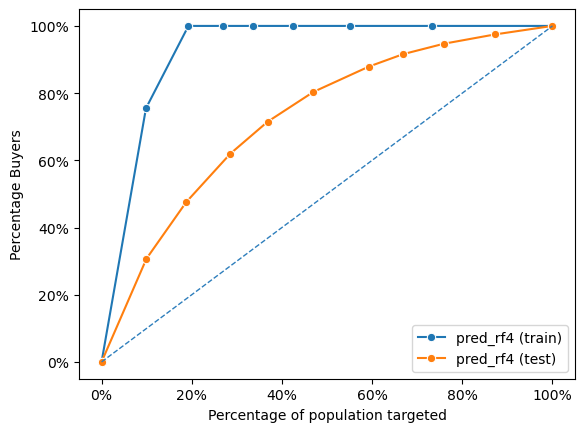

In [65]:
## checking overfitting
treatment['pred_rf4'] = rf4.predict(treatment)['prediction']

dct = {"train": treatment[treatment['rnd_30k'] == 1], "test": treatment[treatment['rnd_30k'] == 0]}
fig2 = rsm.gains_plot(dct, "converted", "yes", "pred_rf4")

**5. Compare the performance of the random forest “ad” model and the logistic regression “ad” model from Part IV using data from the 120,000K customers that are not in group 2. Use gains curves and AUC for the comparison. What do you find? (2 points)**

In [66]:
# gains plot
treatment['pred_rf3'] = rf3.predict(treatment)['prediction']
treatment['pred_rf4'] = rf4.predict(treatment)['prediction']

dct = {"train": treatment[treatment['rnd_30k'] == 1], "test": treatment[treatment['rnd_30k'] == 0]}

/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


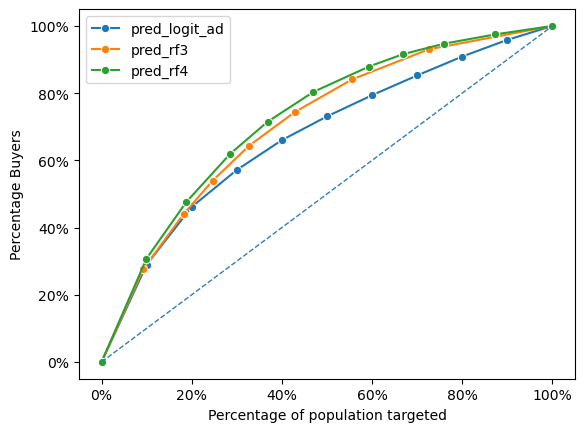

In [67]:
## gains plot
fig4 = rsm.gains_plot(treatment[treatment.rnd_30k == 0], "converted", "yes", ['pred_logit_ad',"pred_rf3",'pred_rf4'])

**AUC**

In [68]:
rf3_auc= rsm.auc(treatment[treatment.rnd_30k == 0]['converted'],
                    treatment[treatment.rnd_30k == 0]['pred_rf3'],
                    'yes')

rf3_auc

0.744493748978181

In [69]:
rf4_auc= rsm.auc(treatment[treatment.rnd_30k == 0]['converted'],
                    treatment[treatment.rnd_30k == 0]['pred_rf4'],
                    'yes')

rf4_auc

0.7642289937593478

In [70]:
not_group2_auc2

0.7030674399706048

**AUC Analysis:**
- The random forest model rf3 (pred_rf3) has an AUC of 0.7445, suggesting it has a good ability to differentiate between customers who converted and those who did not.
- The random forest model rf4 (pred_rf4) shows an even better AUC of 0.7642, indicating a superior discriminative ability compared to rf3.
- The logistic regression “ad” model (pred_logit_ad) has an AUC of 0.7031, which is lower than both random forest models but still demonstrates a reasonable ability to distinguish between the two customer groups.
- The comparison clearly indicates that the random forest models, especially rf4, are better at predicting conversions than the logistic regression model on the 120,000 customers not included in Group 2.

**Overfitting Analysis:**
- There is an indication of potential overfitting in the random forest models, especially when considering the AUC results from the test set (customers not in Group 2).
- Overfitting may be due to the relatively small size of the test set compared to the training set, which can cause the models, particularly the more complex ones like random forests, to learn patterns that are too specific to the training data and do not generalize well to new data.
- The high performance of the rf4 model might be an artifact of overfitting, which is a critical consideration when evaluating model performance. 

**Conclusion:**
The results show that while the random forest models outperform the logistic regression in terms of AUC, we must be cautious in interpreting these results due to the potential for overfitting. Overfitting can lead to overly optimistic performance estimates that do not hold up in practice. Therefore, it's essential to apply techniques to mitigate overfitting, such as using a more balanced split between training and testing sets, applying regularization, or employing methods like cross-validation to ensure the models' generalizability. The use of more complex models such as random forests should be carefully validated to ensure they provide reliable and actionable insights for marketing strategies.

**6. Calculate the profit improvement of using the random forest “ad” model and the logistic regression “ad” model to target the best 30,000 customers out of the 120,000K customers that are not in group 2.**

In [71]:
## sort by pred_rf3
treatment_dropped4 = treatment[treatment['rnd_30k'] == 0]
sort_treatment_dropped4_rf3  = treatment_dropped4.sort_values(by=['pred_rf3'], ascending=False)
## select top 30,000 customers
best30k_rf3 = sort_treatment_dropped4_rf3.head(30000)

## profit
best30k_rf3['converted_numeric'] = best30k_rf3['converted'].map({'yes': 1, 'no': 0}).astype(float)
profit_rf3 = rev * best30k_rf3['converted_numeric'].sum() - cost2 * len(best30k_rf3)

profit_rf3, profit_ad

diff_rf3 = profit_rf3 - profit_ad

profit_ad, profit_rf3, diff_rf3
print(f"The profit has improved by ad_rf3: {diff_rf3}")

The profit has improved by ad_rf3: 5081.610000000001


/tmp/ipykernel_63350/2179117254.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best30k_rf3['converted_numeric'] = best30k_rf3['converted'].map({'yes': 1, 'no': 0}).astype(float)


In [72]:
## sort by pred_rf3
treatment_dropped5 = treatment[treatment['rnd_30k'] == 0]
sort_treatment_dropped5_rf4  = treatment_dropped4.sort_values(by=['pred_rf4'], ascending=False)
## select top 30,000 customers
best30k_rf4 = sort_treatment_dropped5_rf4.head(30000)

## profit
best30k_rf4['converted_numeric'] = best30k_rf4['converted'].map({'yes': 1, 'no': 0}).astype(float)
profit_rf4 = rev * best30k_rf4['converted_numeric'].sum() - cost2 * len(best30k_rf4)

profit_rf4, profit_ad

diff_rf4 = profit_rf4 - profit_ad

profit_ad, profit_rf4, diff_rf4
print(f"The profit has improved by ad_rf4: {diff_rf4}")

The profit has improved by ad_rf4: 12441.699999999997


/tmp/ipykernel_63350/1943041982.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best30k_rf4['converted_numeric'] = best30k_rf4['converted'].map({'yes': 1, 'no': 0}).astype(float)


### Part VI: Generative AI (5 points)

Use of Generative AI Tools: (Please see PDF as well)

Our team extensively utilized Generative AI tools, particularly ChatGPT, to augment our analysis and problem-solving capabilities for the case study. These tools played a pivotal role in several aspects of our project, from initial data exploration to fine-tuning our machine learning models.

Support in Data Analysis:

Data Cleaning and Preprocessing: ChatGPT assisted in generating code snippets for data cleaning and preprocessing. It provided guidance on handling missing values, encoding categorical variables, and standardizing data. However, we noticed that while ChatGPT could suggest general approaches, specific data intricacies required our manual intervention.

Feature Engineering: ChatGPT was instrumental in brainstorming ideas for feature engineering. It suggested several creative ways to construct new features that could potentially improve our model's performance. The limitation, though, was in evaluating the effectiveness of these features, which depended on our experimentation and validation.

Model Development and Optimization:

Algorithm Selection: ChatGPT offered insights into choosing appropriate machine learning algorithms based on our data's characteristics and our specific objectives. While its recommendations were valuable, we still relied on cross-validation scores to make final decisions.

Hyperparameter Tuning: ChatGPT explained various hyperparameter tuning techniques, such as grid search and random search, which we applied to optimize our models. However, determining the optimal range and values of hyperparameters required trial and error on our part.

Interpreting Results: ChatGPT helped interpret model outputs and metrics, facilitating a deeper understanding of our models' performances. Its explanations of concepts like AUC scores and confusion matrices were particularly helpful. Nonetheless, translating these insights into actionable strategies was a task that required human judgment.

Documentation and Reporting:

Report Writing: ChatGPT assisted in drafting sections of our report, providing a framework for presenting our findings coherently. It was adept at generating narrative explanations but less effective at creating context-specific analyses, necessitating our input to tailor the content appropriately.

Debugging and Troubleshooting: When we encountered coding errors or unexpected results, ChatGPT suggested potential fixes. While not always directly solving the issue, it often pointed us in the right direction, saving us time in troubleshooting.

Discussion and Reflection:

Our team's thought process was geared towards leveraging ChatGPT as a brainstorming and initial guidance tool, rather than relying on it for end-to-end solutions. We maximized its benefits by using it to quickly access information and suggestions, which we then critically evaluated and applied with discretion.

One challenge was ensuring that the solutions proposed by ChatGPT were applicable to our specific case context, requiring us to validate its advice against our dataset and objectives.

Questions and Support:

Throughout the project, we queried ChatGPT on best practices for model evaluation, strategies for imbalanced datasets, and approaches for interpreting machine learning models. The tool's responses enriched our understanding and expanded our toolkit, although the applicability of some suggestions varied.

Conclusion:

Using Generative AI tools like ChatGPT has underscored the importance of blending automated insights with human expertise. While ChatGPT significantly accelerated our research and development phases, critical thinking and domain knowledge remained indispensable in navigating towards effective solutions.